# Bankruptcy Prediction: EDA and Ensemble Modeling

## Objective

The goal is to perform an ensemble machine learning approach to predict bankruptcy. Before diving into modeling, we'll conduct an Exploratory Data Analysis (EDA) to understand the dataset and address any issues such as missing values or class imbalances.

In [1]:
!pip install -q kaggle


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
!kaggle datasets download -d fedesoriano/company-bankruptcy-prediction

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction
License(s): copyright-authors
  0%|                                               | 0.00/4.63M [00:00<?, ?B/s]
100%|██████████████████████████████████████| 4.63M/4.63M [00:00<00:00, 4.91MB/s]


In [3]:
!unzip company-bankruptcy-prediction.zip

Archive:  company-bankruptcy-prediction.zip
  inflating: data.csv                


In [4]:
# Importing necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows of the dataset
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [7]:
# Check for class imbalance in the target variable 'Bankrupt?'
class_distribution = df['Bankrupt?'].value_counts(normalize=True) * 100
class_distribution

Bankrupt?
0    96.77372
1     3.22628
Name: proportion, dtype: float64

## Exploratory Data Analysis (EDA)

In this section, we'll explore the dataset to understand the distribution of features, identify outliers, and examine correlations.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [9]:
# Summary statistics of the dataset
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [15]:
print(df.columns)

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [20]:
# Remove leading white spaces from column names
df.columns = df.columns.str.strip()

# Rename the ROA columns
df = df.rename(columns={
    'ROA(C) before interest and depreciation before interest': 'ROA(C)',
    'ROA(A) before interest and % after tax': 'ROA(A)',
    'ROA(B) before interest and depreciation after tax': 'ROA(B)'
})

In [21]:
print(df.columns)

Index(['Bankrupt?', 'ROA(C)', 'ROA(A)', 'ROA(B)', 'Operating Gross Margin',
       'Realized Sales Gross Margin', 'Operating Profit Rate',
       'Pre-tax net Interest Rate', 'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate',
       'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate',
       'Total Asset Growth Rate', 'Net Va

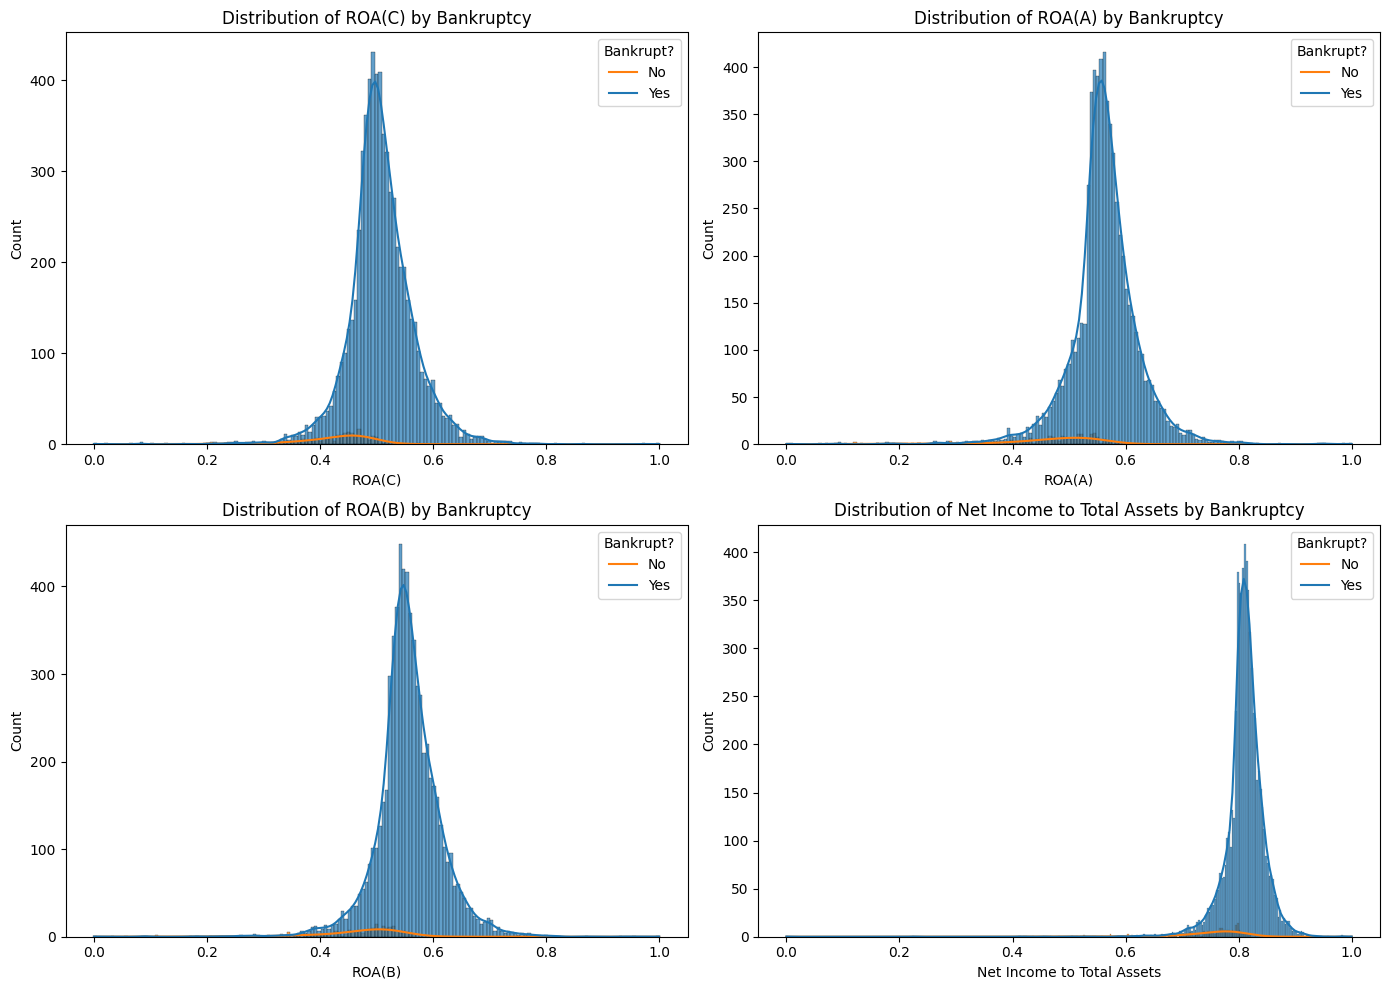

In [27]:
# Visualizing the distribution of a few key features with bankruptcy information
selected_features = ['ROA(C)', 'ROA(A)', 'ROA(B)', 'Net Income to Total Assets']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.histplot(data=df, x=feature, hue='Bankrupt?', kde=True, ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Distribution of {feature} by Bankruptcy')
    axes[i].legend(title='Bankrupt?', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

## Feature Importance and Correlation

Given that the dataset has 95 features, it's crucial to identify the most important ones and understand their correlation with the target variable 'Bankrupt?'. This will not only improve the model's performance but also provide actionable insights.

In [25]:
# Correlation matrix to identify correlated features with the target variable
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Bankrupt?'].sort_values(ascending=False)

# Top 10 positively correlated features
top_pos_correlated = correlation_with_target.head(10)

# Top 10 negatively correlated features
top_neg_correlated = correlation_with_target.tail(10)

top_pos_correlated, top_neg_correlated

(Bankrupt?                              1.000000
 Debt ratio %                           0.250161
 Current Liability to Assets            0.194494
 Borrowing dependency                   0.176543
 Current Liability to Current Assets    0.171306
 Liability to Equity                    0.166812
 Current Liabilities/Equity             0.153828
 Current Liability to Equity            0.153828
 Liability-Assets Flag                  0.139212
 Total expense/Assets                   0.139049
 Name: Bankrupt?, dtype: float64,
 Per Share Net profit before tax (Yuan ¥)   -0.201395
 Net profit before tax/Paid-in capital      -0.207857
 Retained Earnings to Total Assets          -0.217779
 Persistent EPS in the Last Four Seasons    -0.219560
 Net worth/Assets                           -0.250161
 ROA(C)                                     -0.260807
 ROA(B)                                     -0.273051
 ROA(A)                                     -0.282941
 Net Income to Total Assets                 

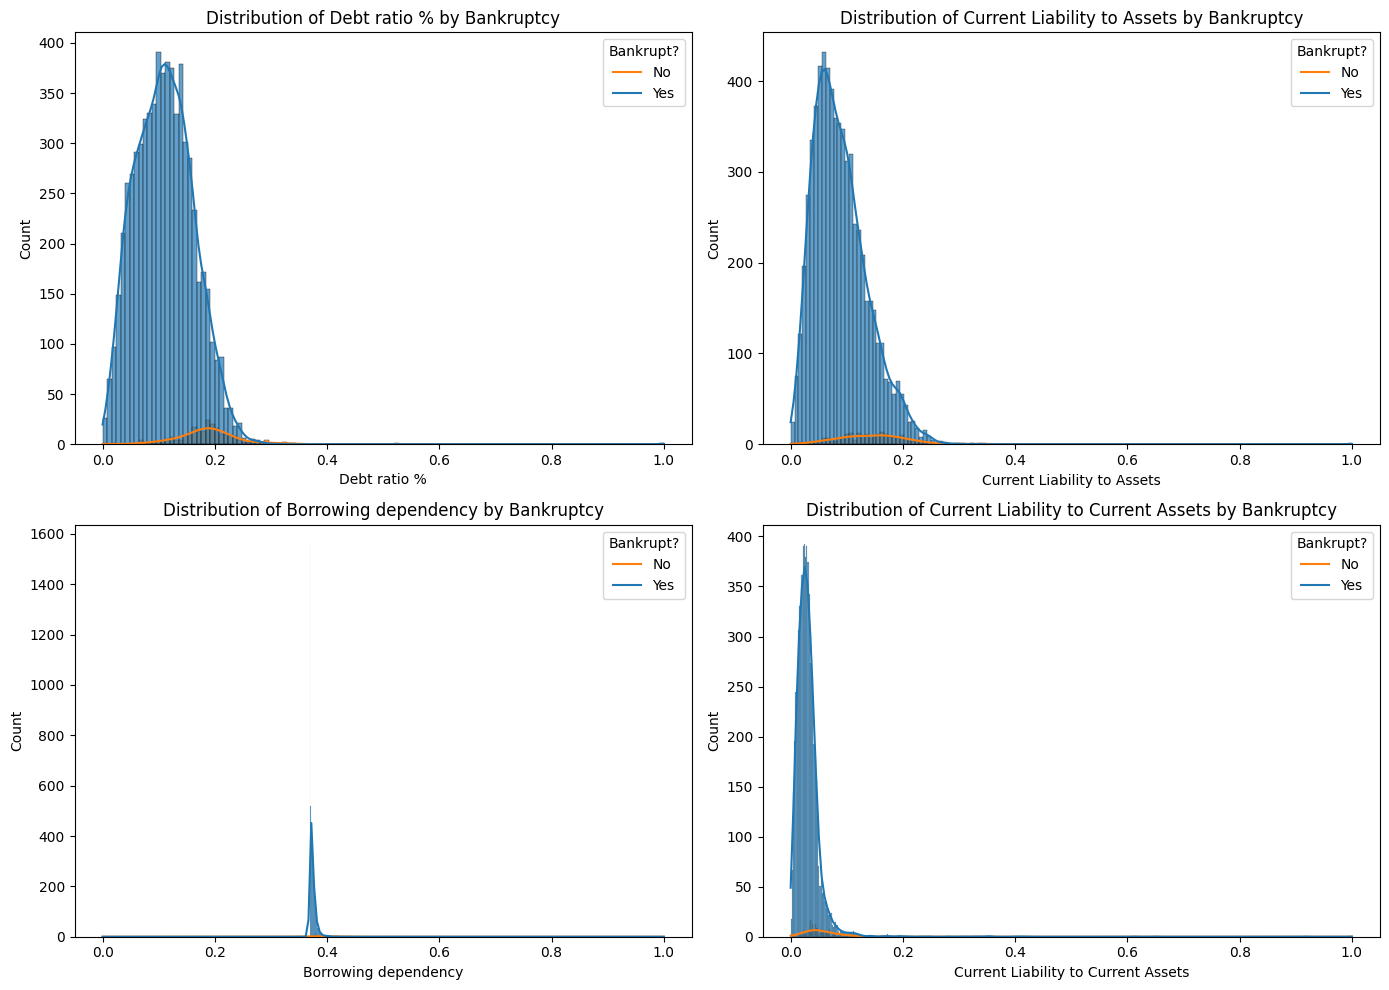

In [26]:
# Visualizing the distribution of top 4 key features with bankruptcy information
selected_features = ['Debt ratio %', 'Current Liability to Assets', 'Borrowing dependency', 'Current Liability to Current Assets']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.histplot(data=df, x=feature, hue='Bankrupt?', kde=True, ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Distribution of {feature} by Bankruptcy')
    axes[i].legend(title='Bankrupt?', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

## Advanced Visualizations

To gain deeper insights into the data, we'll create some advanced visualizations. This will include:

1. Heatmap for top correlated features with the target variable 'Bankrupt?'.
2. Pairplot for selected features to visualize the interaction between them.
3. Boxplot to identify outliers in key financial ratios.

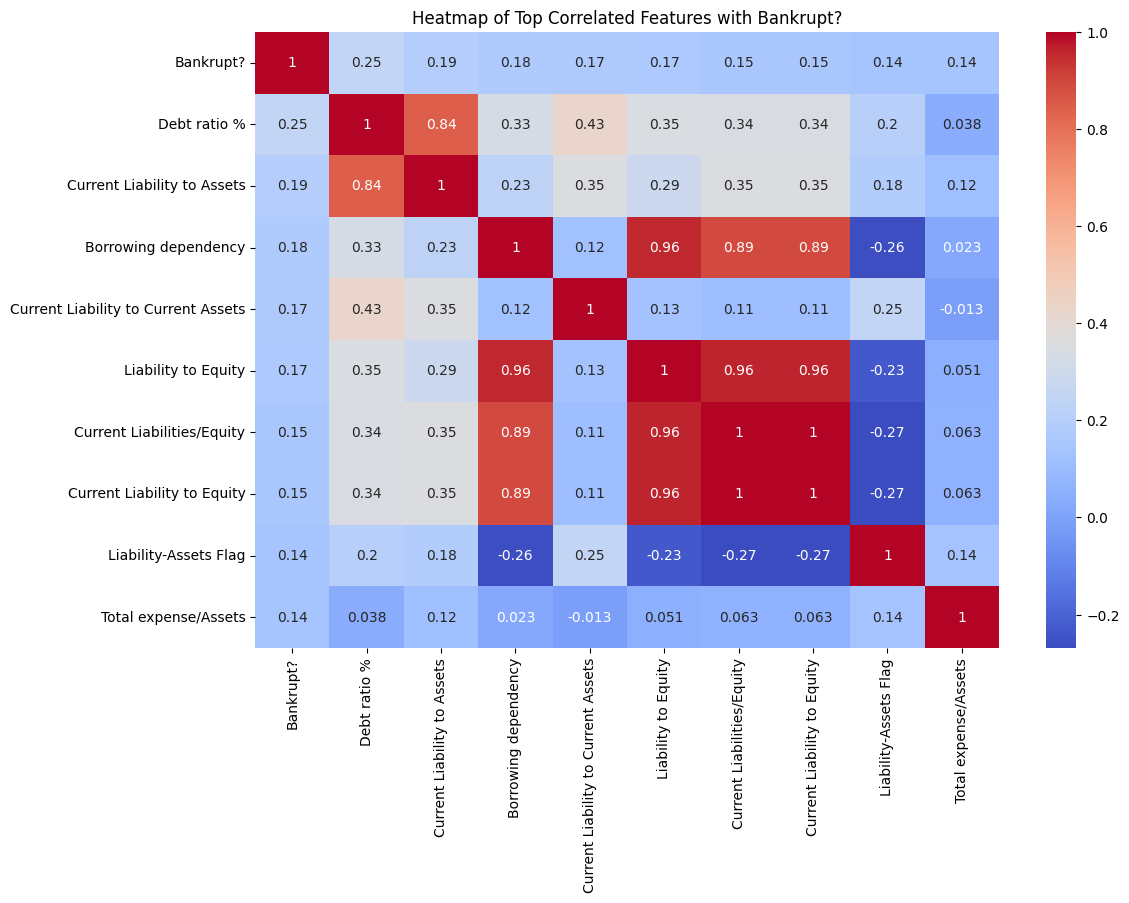

In [28]:
# Heatmap for top correlated features with 'Bankrupt?'
top_correlated_features = correlation_with_target.index.tolist()[:10]
top_correlation_matrix = df[top_correlated_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Top Correlated Features with Bankrupt?')
plt.show()

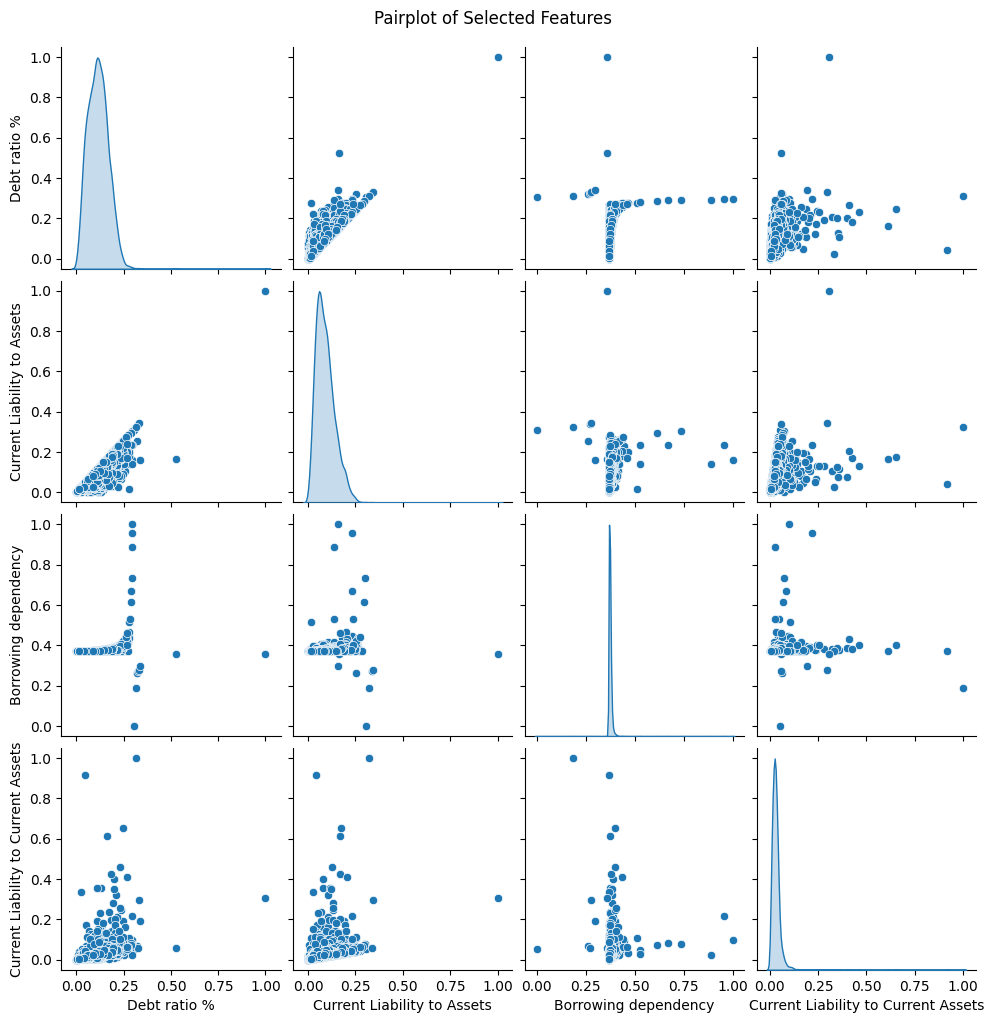

In [29]:
# Pairplot for selected features
selected_features_for_pairplot = top_correlated_features[1:5]  # Excluding 'Bankrupt?'
sns.pairplot(df[selected_features_for_pairplot], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

## Data Preprocessing and Handling Class Imbalance with SMOTE

In this section, we'll prepare the data for modeling. This involves:

1. Scaling the features
2. Splitting the data into training and testing sets
3. Addressing class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)

In [31]:
!pip install -q imblearn


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [32]:
# Importing necessary libraries for data preprocessing and SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separating features and target variable
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Applying SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

## Ensemble Modeling

In this section, we'll build an ensemble of models to predict bankruptcy. The ensemble will include:

1. Random Forest
2. XGBoost
3. Neural Network
4. Support Vector Machine (SVM) for added diversity

We'll evaluate each model on various metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

In [35]:
!pip install -q xgboost


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [36]:
# Importing necessary libraries for ensemble modeling
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
nn = MLPClassifier(random_state=42)

# List of models
models = [rf, xgb, svm, nn]
model_names = ['Random Forest', 'XGBoost', 'SVM', 'Neural Network']

# Dictionary to store performance metrics
metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'ROC-AUC': []}

# Evaluate each model
for model, name in zip(models, model_names):
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Store metrics
    metrics['Accuracy'].append(acc)
    metrics['Precision'].append(prec)
    metrics['Recall'].append(rec)
    metrics['F1-Score'].append(f1)
    metrics['ROC-AUC'].append(roc_auc)

    print(f'{name} Model Evaluation:')
    print(f'Accuracy: {acc}')
    print(f'Precision: {prec}')
    print(f'Recall: {rec}')
    print(f'F1-Score: {f1}')
    print(f'ROC-AUC: {roc_auc}')
    print('---'*10)

# Summary of all models
metrics_summary = pd.DataFrame(metrics, index=model_names)
metrics_summary

Random Forest Model Evaluation:
Accuracy: 0.9611436950146628
Precision: 0.4262295081967213
Recall: 0.5909090909090909
F1-Score: 0.49523809523809526
ROC-AUC: 0.9467630853994491
------------------------------
XGBoost Model Evaluation:
Accuracy: 0.966275659824047
Precision: 0.4791666666666667
Recall: 0.5227272727272727
F1-Score: 0.5
ROC-AUC: 0.9491219008264463
------------------------------
SVM Model Evaluation:
Accuracy: 0.8892961876832844
Precision: 0.17575757575757575
Recall: 0.6590909090909091
F1-Score: 0.277511961722488
ROC-AUC: 0.9134814049586776
------------------------------
Neural Network Model Evaluation:
Accuracy: 0.9618768328445748
Precision: 0.39473684210526316
Recall: 0.3409090909090909
F1-Score: 0.36585365853658536
ROC-AUC: 0.8176308539944903
------------------------------


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Random Forest,0.961144,0.426230,0.590909,0.495238,0.946763
XGBoost,0.966276,0.479167,0.522727,0.500000,0.949122
SVM,0.889296,0.175758,0.659091,0.277512,0.913481
Neural Network,0.961877,0.394737,0.340909,0.365854,0.817631


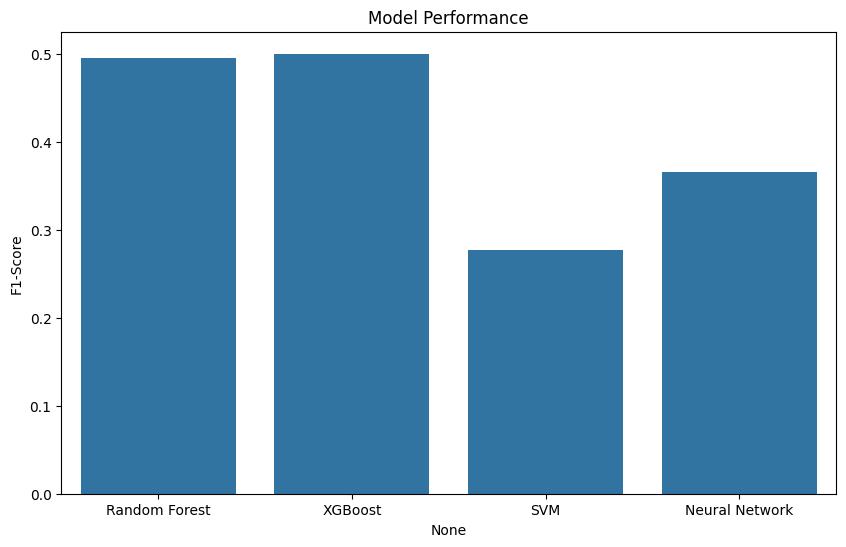

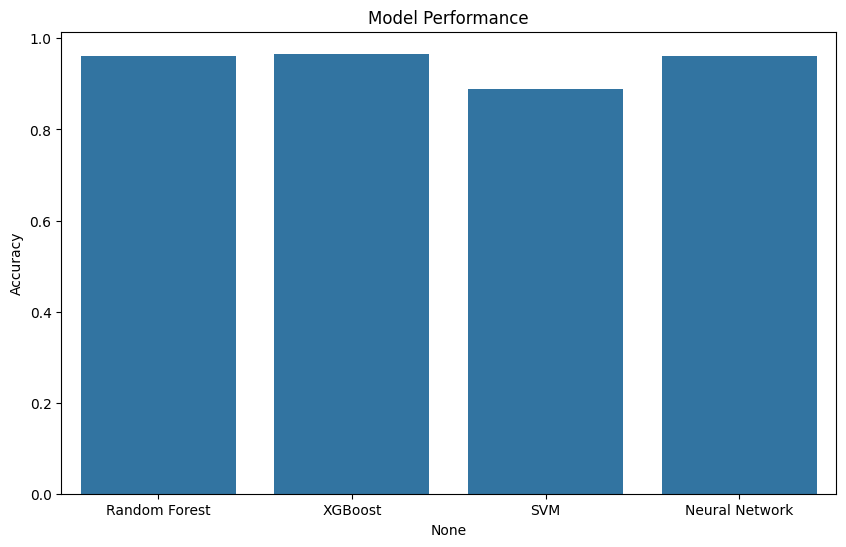

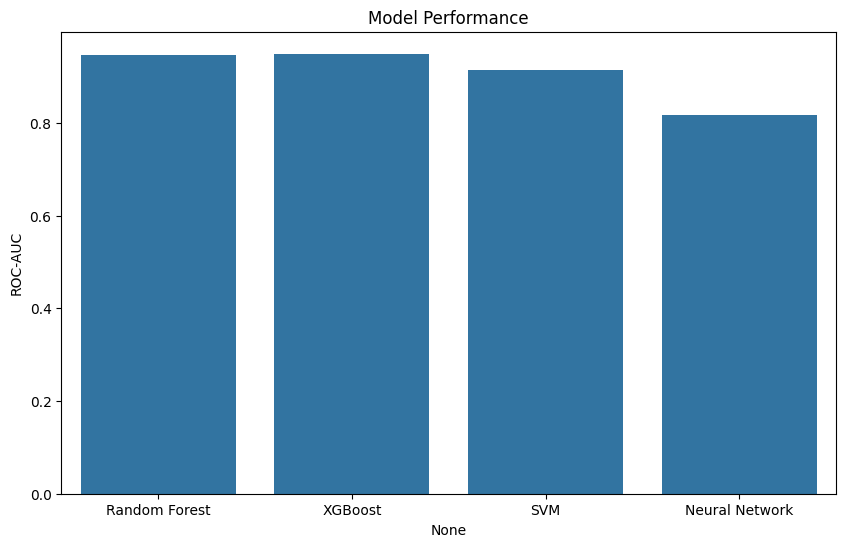

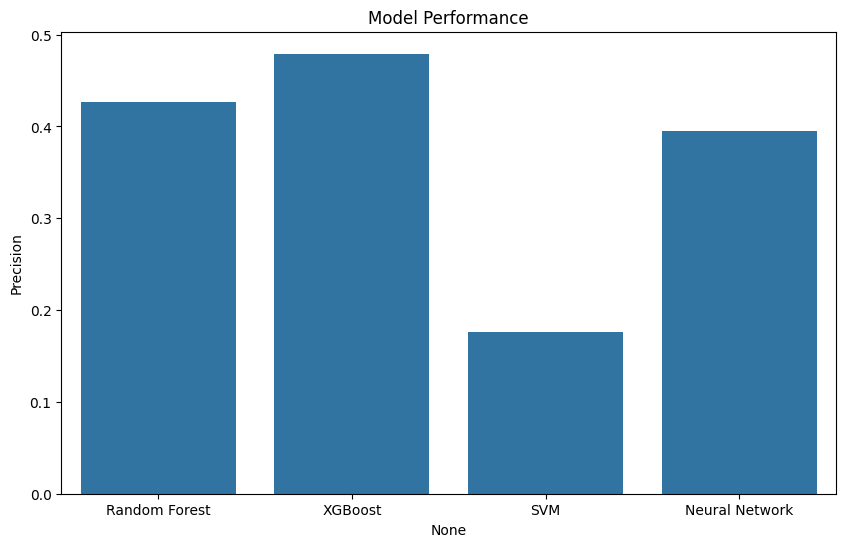

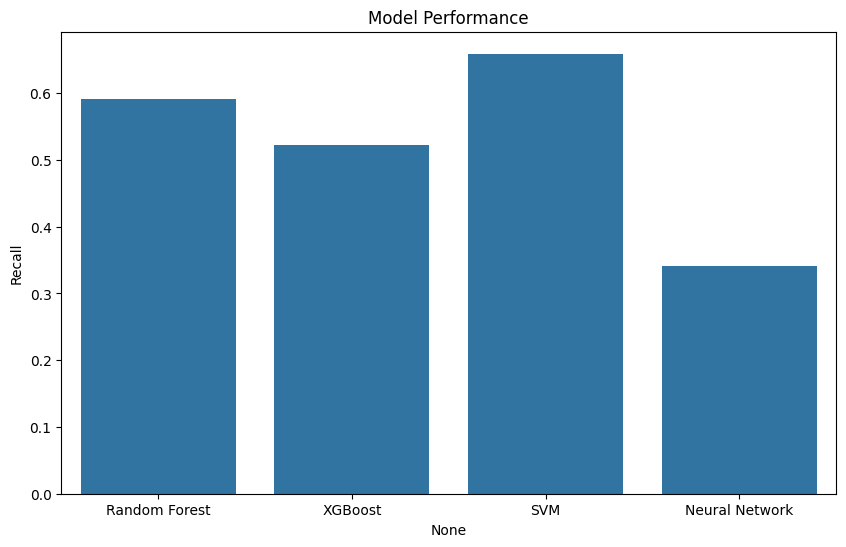

In [40]:
# Visualize the model performance over all metrics 
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_summary.index, y='F1-Score', data=metrics_summary)
plt.title('Model Performance')
plt.ylabel('F1-Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_summary.index, y='Accuracy', data=metrics_summary)
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_summary.index, y='ROC-AUC', data=metrics_summary)
plt.title('Model Performance')
plt.ylabel('ROC-AUC')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_summary.index, y='Precision', data=metrics_summary)
plt.title('Model Performance')
plt.ylabel('Precision')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_summary.index, y='Recall', data=metrics_summary)
plt.title('Model Performance')
plt.ylabel('Recall')
plt.show()

## Optimizing Neural Network for Faster Training

Neural Networks can be computationally intensive and take a long time to train, especially on large datasets. To speed up the training process, we can:

1. Reduce the number of hidden layers and neurons.
2. Use a simpler activation function.
3. Limit the number of epochs.

In [41]:
# Initialize a simpler and faster Neural Network model
fast_nn = MLPClassifier(hidden_layer_sizes=(50,), activation='logistic', max_iter=100, random_state=42)

# Train and evaluate the faster Neural Network model
fast_nn.fit(X_resampled, y_resampled)
y_pred_fast_nn = fast_nn.predict(X_test)
y_proba_fast_nn = fast_nn.predict_proba(X_test)[:, 1]

# Calculate metrics for the faster Neural Network
acc_fast_nn = accuracy_score(y_test, y_pred_fast_nn)
prec_fast_nn = precision_score(y_test, y_pred_fast_nn)
rec_fast_nn = recall_score(y_test, y_pred_fast_nn)
f1_fast_nn = f1_score(y_test, y_pred_fast_nn)
roc_auc_fast_nn = roc_auc_score(y_test, y_proba_fast_nn)

fast_nn_metrics = {'Accuracy': acc_fast_nn, 'Precision': prec_fast_nn, 'Recall': rec_fast_nn, 'F1-Score': f1_fast_nn, 'ROC-AUC': roc_auc_fast_nn}
fast_nn_metrics

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Accuracy': 0.9376832844574781,
 'Precision': 0.28421052631578947,
 'Recall': 0.6136363636363636,
 'F1-Score': 0.3884892086330935,
 'ROC-AUC': 0.8863980716253445}

## Visualizing Model Performance

Since the XGBoost model showed the highest accuracy, let's visualize its performance using various plots:

1. Confusion Matrix: To understand the true positives, true negatives, false positives, and false negatives.
2. ROC Curve: To visualize the trade-off between sensitivity (or TPR) and specificity (1-FPR).
3. Feature Importance: To understand which features contributed the most to the model's predictions.

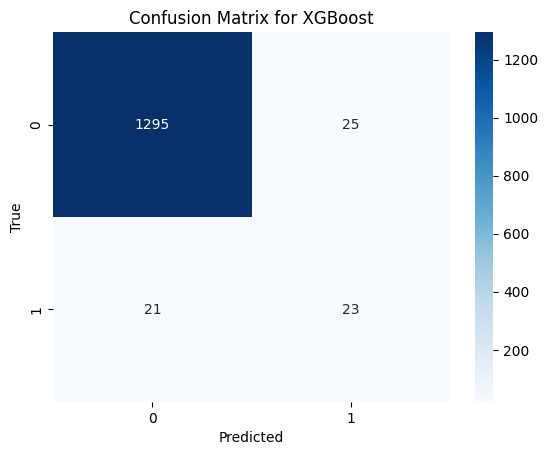

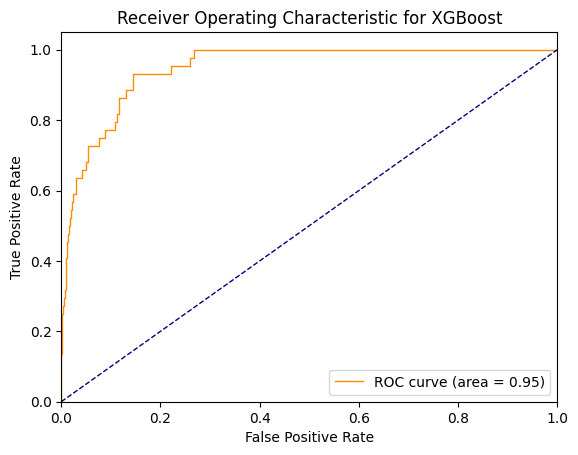

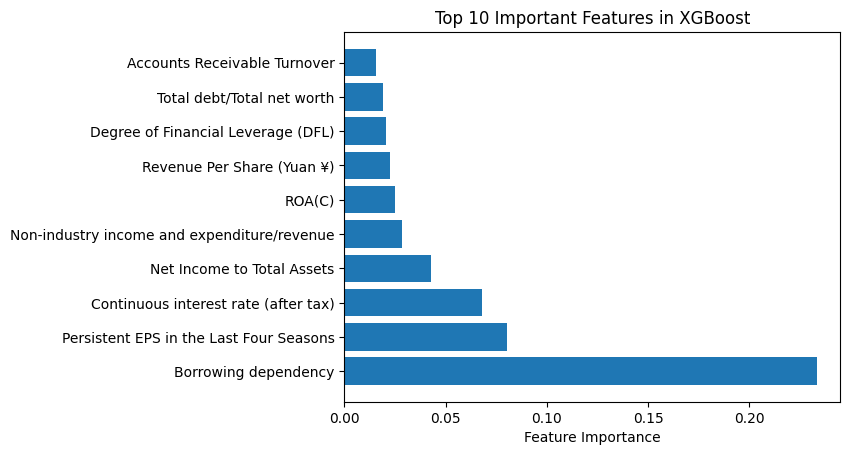

In [42]:
# Importing libraries for visualization
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions and probabilities from XGBoost model
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for XGBoost')
plt.legend(loc='lower right')
plt.show()

# 3. Feature Importance
feature_importance = xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1][:10]
plt.barh(range(10), feature_importance[sorted_idx])
plt.yticks(range(10), [X.columns[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features in XGBoost')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ca721850-30d3-4339-8a87-08ba7408b1bf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>